C:\Users\n10480129\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


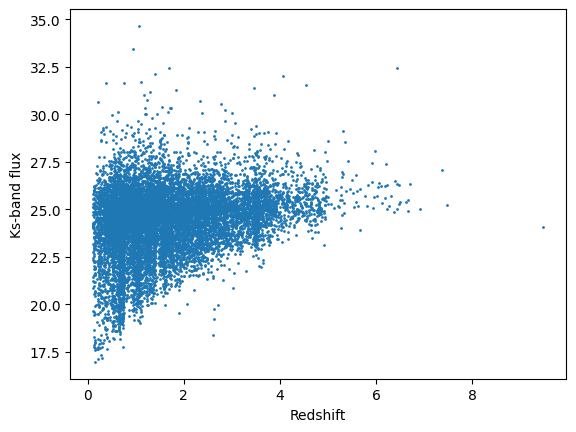

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM

survey_area = 0.11 # square degrees zfourge
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

file = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
data = pd.DataFrame(file)
data = data[data['Use'] == 1]

z = data['zpk']
mag_ab = 25 - 2.5*np.log10(data['FKs'])

plt.scatter(z, mag_ab, s=1)
plt.xlabel('Redshift')
plt.ylabel('Ks-band flux')
plt.show()

C:\Users\n10480129\AppData\Local\Temp\ipykernel_9160\3004070042.py:7: RuntimeWarning: invalid value encountered in log10
  y = a * np.log10(x/d + b) + c


[12.06001093  2.59594078 11.37716288  0.59295321]


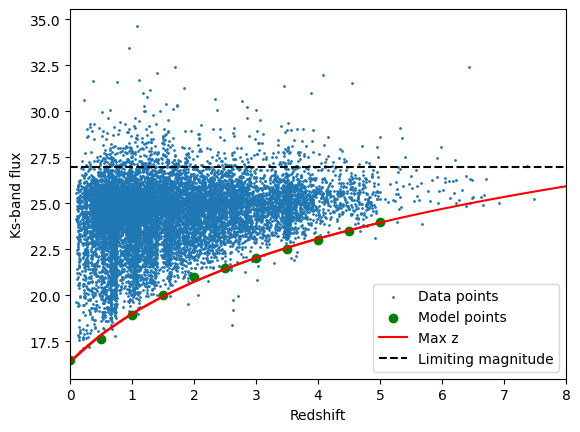

In [17]:
x = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
y = np.array([16.5,17.6,18.9,20,21,21.5,22,22.5,23,23.5,24])

from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    y = a * np.log10(x/d + b) + c 
    return y

p0 = [7.8,2,13.7,0.3]
popt, pcov = curve_fit(func, x, y, p0=p0)
print(popt)

plt.scatter(z, mag_ab, s=1, label='Data points')
plt.scatter(x, y, color='green', label='Model points')
plt.plot(x, func(x, *popt), color='red', label='Max z')
plt.plot(np.linspace(0,8,100), func(np.linspace(0,8,100), *popt), color='red')
plt.xlabel('Redshift')
plt.ylabel('Ks-band flux')
plt.xlim(0,8)
plt.axhline(y=27, linestyle='--', color='black', label='Limiting magnitude')
plt.legend()
plt.show()

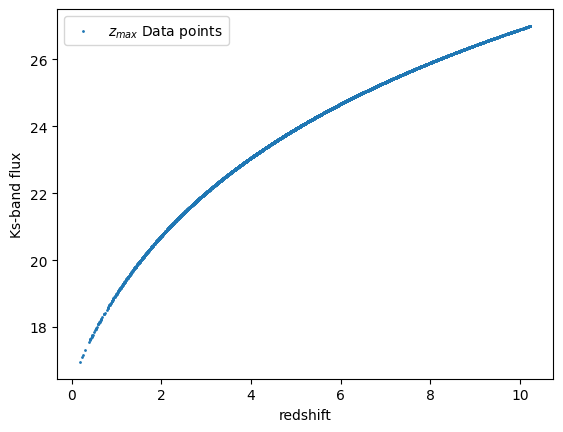

In [19]:
z_max = 0.6 * ((10 ** ((mag_ab - 11.4) / 12.06)) - 2.6) # maximum redshift

mask_27 = mag_ab < 27

plt.scatter(z_max[mask_27], mag_ab[mask_27], s=1, label='$z_{max}$ Data points')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('Ks-band flux')
# plt.xlim(0,8)
plt.legend()
plt.show()

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75
 7.   7.25 7.5  7.75 8.  ]


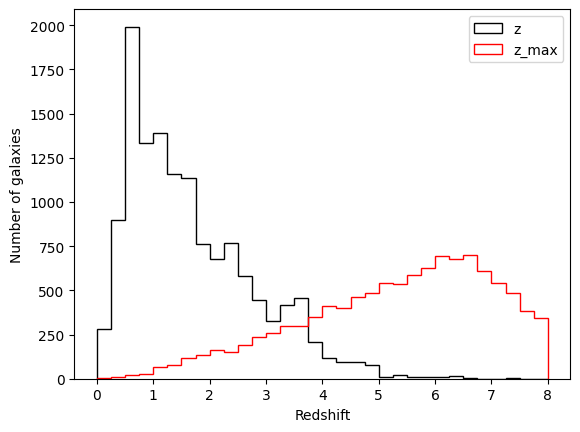

In [31]:
# plot the number of galaxies across redshift
z_bins = np.linspace(0, 8, 33)
print(z_bins)

plt.hist(z, bins=z_bins, histtype='step', color='black', label='z')
plt.hist(z_max, bins=z_bins, histtype='step', color='red', label='z_max')
plt.ylabel('Number of galaxies')
plt.xlabel('Redshift')
plt.legend()
plt.show()

C:\Users\n10480129\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


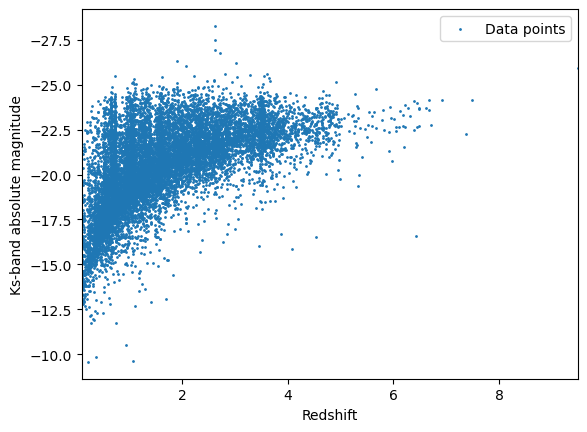

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

file = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
data = pd.DataFrame(file)
data = data[data['Use'] == 1]

z = data['zpk']
lum = data['FKs']
dists = cosmo.luminosity_distance(z) * 10 ** 6

mag_ab = 25 - 2.5*np.log10(lum) # AB apparent magnitude
mag_abs = mag_ab - 5 * np.log10(dists / 10) # absolute magnitude

plt.scatter(z, mag_abs, s=1, label='Data points')
plt.xlabel('Redshift')
plt.ylabel('Ks-band absolute magnitude')
plt.gca().invert_yaxis()
plt.margins(x=0)
# plt.axhline(y=-25, linestyle='--', color='black', label='Limiting magnitude')
plt.legend()
plt.show()
